In [3]:
print("Hello World")
text = "Text Mining"

Hello World


Text Mining
part of speech
42
['It', 'was', 'a', 'bright', 'cold', 'day', 'in', 'April', ',', 'and', 'the', 'clocks', 'were', 'striking', 'thirteen', '.']
It
was
in
bright
It
was
a
bright
cold
day
in
April
,
and
the
clocks
were
striking
thirteen
.
Hair colour: brown
Eye colour: blue
Hair colour:brown


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rache\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['No', '.', '1111', '(', 'Sanitary', '),', 'dated', 'Ootacamund', ',', 'the', '6th', 'October', '1876', '.', 'From', '-', 'The', 'Honourable', 'W', '.']


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rache\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


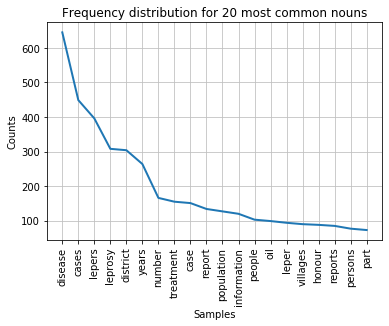

ModuleNotFoundError: No module named 'wordcloud'

In [36]:
text = "Text Mining"
print(text)
text = "part of speech"  # An example of a string
number = 42  # An example of an integer
pi_value = 3.1415  # An example of a float
print(text)
print(number)
sentence = ['It', 'was', 'a','bright', 'cold', 'day', 'in', 'April', ',', 'and', 'the', 'clocks', 'were', 'striking', 'thirteen', '.']
print(sentence) # print all elements
print(sentence[0]) # print the first element
print(sentence[1])
print(sentence[6])
print(sentence[3])
sentence[0:2]
for word in sentence:
    print(word) # prints each element of the list one after the other
haircolour_tuple = ('hair', 'brown')
eyecolour_tuple = ('eyes', 'blue')
print("Hair colour: " + haircolour_tuple[1]) # prints the 2nd entry in the tuple
print("Eye colour: " + eyecolour_tuple[1])
print("Hair colour:"+haircolour_tuple[1])
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

file = open('\\Users\\rache\\Downloads\\nls-text-indiaPapers\\nls-text-indiaPapers\\74457530.txt','r')  # replace the path with the one on your computer
mhbi74457530_raw = file.read()
mhbi74457530_tokens = word_tokenize(mhbi74457530_raw)
mhbi74457530_tokens_lc = [word.lower() for word in mhbi74457530_tokens]
mhbi74457530_tokens_lc[0:20]

from nltk.corpus import PlaintextCorpusReader

corpus_root = '\\Users\\rache\\Downloads\\nls-text-indiaPapers\\nls-text-indiaPapers\\'
mhbi_wordlists = PlaintextCorpusReader(corpus_root, '.*txt', encoding='latin1')
mhbi_corpus_tokens = mhbi_wordlists.words()
print(mhbi_corpus_tokens[:20])

nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag

mhbi74457530_tagged = nltk.pos_tag(mhbi74457530_tokens)
mhbi74457530_tagged[87:109]

nouns = [] 
nouns = [word.lower() for (word, pos) in mhbi74457530_tagged if (pos == 'NN' or pos == 'NNS')] 
nouns[:20]

# this first line is used so that the plot is rendered inline with the text in the notebook 
%matplotlib inline

from nltk.probability import FreqDist
fdist = FreqDist(nouns)
fdist.plot(20,title='Frequency distribution for 20 most common nouns')

from collections import Counter
dictionary=Counter(nouns)  #this turns the nouns list into a frequency dictionary, where each word and its count is recorded

from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
plt.rcParams["figure.figsize"] = (16,12)   # this line specifies the size of the graph
plt.imshow(cloud, interpolation='bilinear')  # this line specifies how the words are layed out in the word cloud
plt.axis('off')
plt.show()

import os
fileNames =[]
dir = "\\Users\\rache\\Downloads\\nls-text-indiaPapers\\nls-text-indiaPapers\\"

for fileName in os.listdir(dir):
    if fileName.endswith(".txt"):
        if fileName != "readme.txt":
            fileNames.append(fileName)
print("Size of this corpus:")
print(len(fileNames))

In [ ]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
plt.rcParams["figure.figsize"] = (16,12)   # this line specifies the size of the graph
plt.imshow(cloud, interpolation='bilinear')  # this line specifies how the words are layed out in the word cloud
plt.axis('off')
plt.show()

import os
fileNames =[]
dir = "\\Users\\rache\\Downloads\\nls-text-indiaPapers\\nls-text-indiaPapers\\"

for fileName in os.listdir(dir):
    if fileName.endswith(".txt"):
        if fileName != "readme.txt":
            fileNames.append(fileName)
print("Size of this corpus:")
print(len(fileNames))

In [ ]:
import os
fileNames =[]
dir = "\\Users\\rache\\Downloads\\nls-text-indiaPapers\\nls-text-indiaPapers\\"

for fileName in os.listdir(dir):
    if fileName.endswith(".txt"):
        if fileName != "readme.txt":
            fileNames.append(fileName)
print("Size of this corpus:")
print(len(fileNames))

outputdir = "\\Users\\rache\\Downloads\\nls-text-indiaPapers\\nls-text-indiaPapers\\" #specify the output directory path on your own computer here

for fileName in fileNames:
    fileID=fileName.strip()

    filepath=dir + fileName
    file = open(filepath,'r', encoding='latin1')
    rawText = file.read()
    print("POS tagging file: " + filepath)
    sentences = nltk.sent_tokenize(rawText)
    tokenised = [nltk.word_tokenize(sent) for sent in sentences]
    posTagged = [nltk.pos_tag(sent) for sent in tokenised]
    file.close()
    
    file_content=""
    for sent in posTagged:
        file_content = file_content + " ".join(word + "_" + tag for word, tag in sent) + "\n"
    
    fileID = fileName.replace(".txt", "")
    posFileName = fileID + "-pos.txt"
    f = open(outputdir+posFileName, "w")
    f.write(file_content)
    f.close()